## Observations and Insights 

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.
 
Let's look at the results;
* Total mice number 249 and if we look at the pie plot for percentage, we can see 50.6% of Male and 49.4% of Female mice.

* Capomulin & Ramicane seem to be the most effective treatments.

* If we look at the Capomulin data results; it was the most effective drug in reducing the average tumor size and highest survival rate of any treatment in the trial.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path  = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results  = pd.read_csv(study_results_path)
# Combine the data into a single dataset
StudyDf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
StudyDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
MiceNumber    = len(StudyDf["Mouse ID"].unique())
MiceNumberDf = pd.DataFrame({"Total Mice": [MiceNumber]})
MiceNumberDf

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MiceDup = StudyDf[StudyDf.duplicated(['Mouse ID', 'Timepoint'])]
MiceDup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
MiceDupID = MiceDup.drop_duplicates()
MiceDupID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MiceClean     = StudyDf.loc[StudyDf['Mouse ID'] != 'g989']
MiceClean_df  = pd.DataFrame(MiceClean)
MiceClean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
MC_Number = MiceClean_df["Mouse ID"].value_counts()
# MC_Number = pd.DataFrame(MC_Number)
MC_Number

d251    10
r944    10
c402    10
j365    10
s337    10
        ..
x226     1
o848     1
v199     1
n482     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

# Regimen
Summary = pd.DataFrame(StudyDf.groupby("Drug Regimen").count())
#Use groupby to create summary stats by drug regime, add results into columns in Summary
Summary["Mean"]     = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
Summary["Median"]   = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
Summary["Standard Deviation"] = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
Summary["Variance"] = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
Summary["SEM"]      = pd.DataFrame(StudyDf.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
#Clean up columns, just keeping a count column for some of the graphs below
Summary = Summary[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
#Rename count column
Summary = Summary.rename(columns = {"Mouse ID" : "Trials"})
Summary.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar Plots

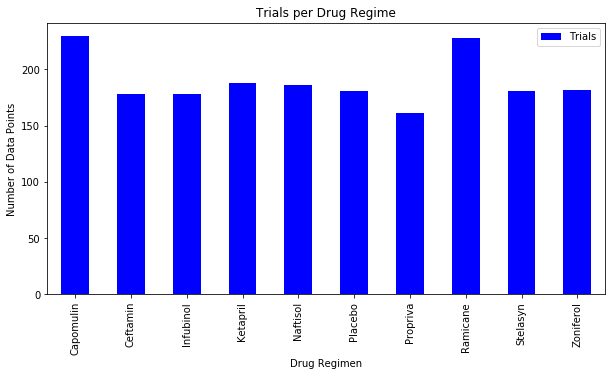

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Filter the DataFrame down only to those columns to chart
Data = Summary[["Trials"]]
# Use DataFrame.plot() in order to create a bar chart of the data
Data.plot(kind="bar", color = "b", figsize=(10,5), legend = 'best')
# Set a title for the chart
plt.title("Trials per Drug Regime")
plt.ylabel("Number of Data Points")
plt.show()
plt.tight_layout()
plt.savefig('../Images/Data points by Drug')

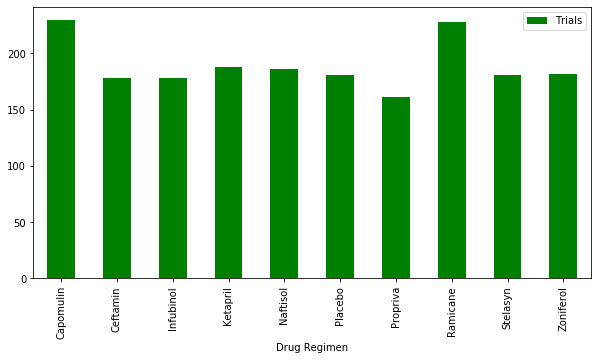

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
Bar_plot = Data.plot(kind="bar", figsize=(10,5), color = "g")

## Pie Plots

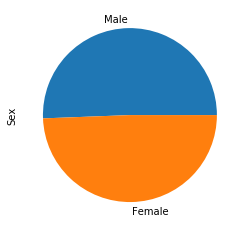

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
PiePlot = StudyDf["Sex"].value_counts().plot.pie()

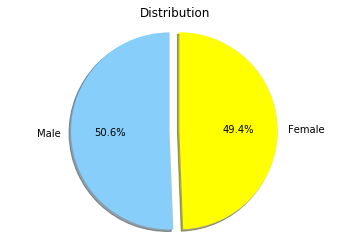

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution")
plt.pie(StudyDf["Sex"].value_counts(), labels=["Male","Female"],colors = ["lightskyblue", "yellow"], explode = (0.1, 0), autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig('../Images/Demographics Pie')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
##  I'm starting at Ramicane first then Capomulin, Infubinol and Ceftamin(I choosed after the Ramicane from Summary Statistics output first 3).
### Make new a DataFrame then Manipulate the data and repeat for each drugs and print. 

####Ramicane
Ramicane      = StudyDf.loc[StudyDf["Drug Regimen"] == "Ramicane", :]
RamicaneL     = Ramicane.groupby('Mouse ID').max()['Timepoint']
RamicaneMerge = pd.DataFrame(RamicaneL)
RamicaneMerge = pd.merge(Ramicane, RamicaneMerge, on=("Mouse ID","Timepoint"),how="right")
# RamicaneMerge.head()
RamTV     = RamicaneMerge["Tumor Volume (mm3)"]
quartiles = RamTV .quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr    = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane  potential outliers; below {lower_bound} or above {upper_bound}")

####Capomulin
Capomulin      = StudyDf.loc[StudyDf["Drug Regimen"] == "Capomulin",:]
CapomulinL     = Capomulin.groupby('Mouse ID').max()['Timepoint']
CapomulinMerge = pd.DataFrame(CapomulinL)
CapomulinMerge = pd.merge(Capomulin, CapomulinMerge, on=("Mouse ID","Timepoint"),how="right")
# CapomulinMerge.head()
CapTV     = CapomulinMerge["Tumor Volume (mm3)"]
quartiles = CapTV.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr    = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers; below {lower_bound}  or above {upper_bound}")

####Infubinol
Infubinol      = StudyDf.loc[StudyDf["Drug Regimen"] == "Infubinol", :]
InfubinolL     = Infubinol.groupby('Mouse ID').max()['Timepoint']
InfubinolMerge = pd.DataFrame(InfubinolL)
InfubinolMerge = pd.merge(Infubinol, InfubinolMerge, on=("Mouse ID","Timepoint"),how="right")
# InfubinolMerge.head()
InfTV     = InfubinolMerge["Tumor Volume (mm3)"]
quartiles = InfTV.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr    = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers; below {lower_bound}  or above {upper_bound}")

####Ceftamin
Ceftamin      = StudyDf.loc[StudyDf["Drug Regimen"] == "Ceftamin", :]
CeftaminL     = Ceftamin.groupby('Mouse ID').max()['Timepoint']
CeftaminMerge = pd.DataFrame(CeftaminL)
CeftaminMerge = pd.merge(Ceftamin, CeftaminMerge, on=("Mouse ID","Timepoint"))
# CeftaminMerge.head()
CefTV     = CeftaminMerge["Tumor Volume (mm3)"]
quartiles = CefTV.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr    = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin  potential outliers; below {lower_bound} or above {upper_bound}")

Ramicane  potential outliers; below 17.912664470000003 or above 54.30681135
Capomulin potential outliers; below 20.70456164999999  or above 51.83201549
Infubinol potential outliers; below 36.83290494999999  or above 82.74144559000001
Ceftamin  potential outliers; below 25.355449580000002 or above 87.66645829999999


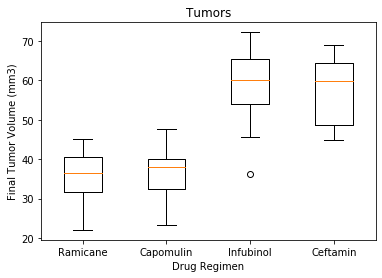

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

FinalTumorVolume = [RamTV, CapTV, InfTV, CefTV]
fig1, ax1        = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(FinalTumorVolume, labels=["Ramicane", "Capomulin", "Infubinol", "Ceftamin",])
plt.savefig('../Images/Final Tumor Volume by Drugs')
plt.show()

## Line and Scatter Plots

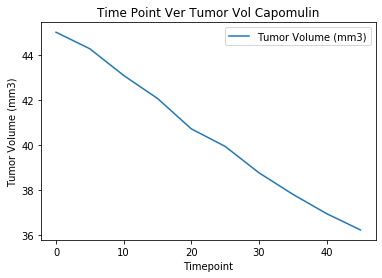

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
VTumor     = StudyDf.drop(["Mouse ID"],axis = 1)
VTumorL    = VTumor.groupby(["Drug Regimen", "Timepoint"]).mean()
VTumorL    = VTumorL.reset_index()
CapomulinL = VTumorL.loc[VTumorL["Drug Regimen"]=="Capomulin"]
ax = plt.gca()
CapomulinL.plot(kind='line',x="Timepoint",y="Tumor Volume (mm3)",legend = 'best', ax=ax)
plt.title("Time Point Ver Tumor Vol Capomulin")
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('../Images/Time Point Capomulin')
plt.show()

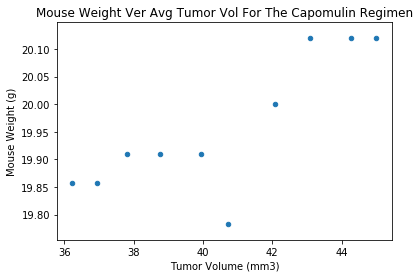

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
TumorV      = StudyDf.drop(["Mouse ID", "Metastatic Sites"], axis =1)
CapomulinL.plot.scatter(y = "Weight (g)", x = "Tumor Volume (mm3)")
plt.title ("Mouse Weight Ver Avg Tumor Vol For The Capomulin Regimen")
plt.ylabel("Mouse Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.savefig('../Images/Mouse Weight Ver Avg Tumor Vol For The Capomulin Regimen')
plt.show()

## Correlation and Regression

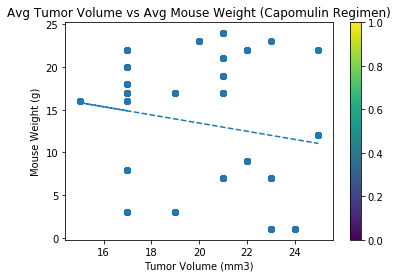

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Weight    = Capomulin.iloc[:,3]
Tumor     = Capomulin.iloc[:,4]
VcSlope, VcInt, VcR, VcP, VcStdErr = linregress(Tumor, Weight)
VolumeCap = VcSlope * Tumor + VcInt
plt.plot(Tumor,VolumeCap,"--")
LineEq    = "y = " + str(round(VcSlope,2)) + "x + " + str(round(VcInt,2))
plt.scatter(Tumor, Weight)
Color     = plt.colorbar()
plt.title("Avg Tumor Volume vs Avg Mouse Weight (Capomulin Regimen)")
plt.ylabel('Mouse Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.savefig('../Images/Avg Tumor Volume vs Avg Mouse Weight (Capomulin Regimen)')
plt.show()